In [2]:
#created by Srisudharshan Manikandan-21BEC2104-VIT University
#import the required libraries 
import pandas as pd 
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r"C:\Users\srisu\OneDrive\Desktop\ML Workshop\tested.csv")

#Basic data details 
rows , columns = df.shape
print("num of rows in data :",rows)
print("the number of column in the data:",columns)

#Basic Data pre-processing to extract required features and mapping the strings to integers

columns_to_drop = ['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin']
df.drop(columns=columns_to_drop, inplace=True)
df.dropna(inplace=True)

#mapping certain features for computing these values
gender_mapping = {'male': 1, 'female': 0}
embarked_mapping={'Q': 2,'C': 3,'S': 4}

# Apply the mapping to the 'Sex' column
df['Sex'] = df['Sex'].map(gender_mapping)
df['Embarked']=df['Embarked'].map(embarked_mapping)
#print(df)

num of rows in data : 891
the number of column in the data: 12


<Axes: xlabel='Survived'>

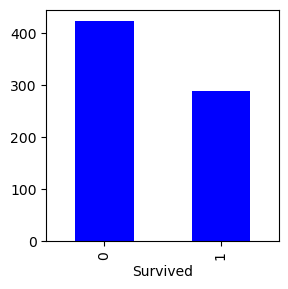

In [5]:
#Basic plot displaying the people survived and dead
survive_people=df['Survived'].value_counts(dropna=False)
survive_people.index = survive_people.index.where(~survive_people.index.isna(), 'unknown')
survive_people.plot(kind='bar',color='blue',figsize=(3,3))


<Axes: xlabel='Pclass'>

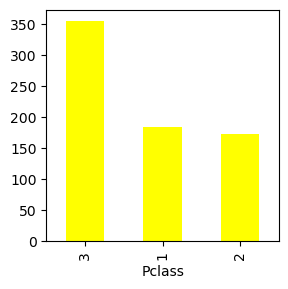

In [6]:
#displaying the number of people in different classes
class_degree=df['Pclass'].value_counts()
class_degree.plot(kind='bar',color='yellow',figsize=(3,3))


<Axes: xlabel='Sex'>

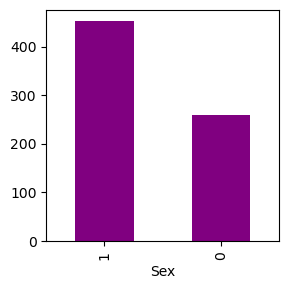

In [7]:
#no of males and females plot
sex_num=df['Sex'].value_counts()
sex_num.plot(kind='bar',color='purple',figsize=(3,3))

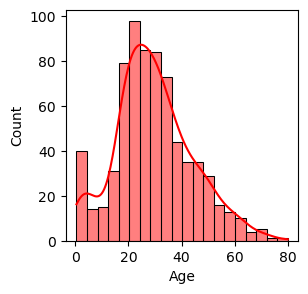

In [4]:
#plot of people as per the age group
plt.figure(figsize=(3,3))
sns.histplot(df['Age'], bins=20, kde=True, color='red') 
plt.show()

<Axes: xlabel='Survived'>

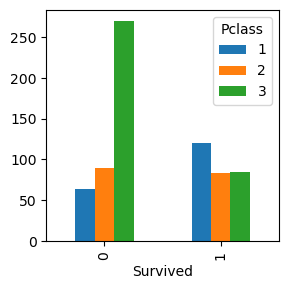

In [35]:
#plotting the people survived as per the classes in the titanic
survive_pclass=pd.crosstab(df['Survived'],df['Pclass'])
survive_pclass.plot(kind='bar',figsize=(3,3))

<Axes: xlabel='Survived'>

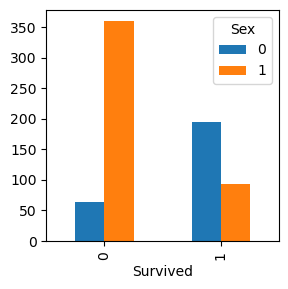

In [16]:
#plotting the people survived as per gender
survive_sex=pd.crosstab(df['Survived'],df['Sex'])
survive_sex.plot(kind='bar',figsize=(3,3)) 
#where 0 represents female and 1 represents male. The gender column has been mapped to 0 and 1 for computing purposes. 

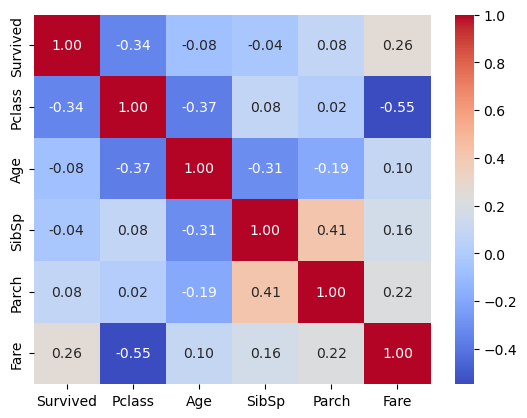

In [12]:
df1=pd.read_csv(r"C:\Users\srisu\OneDrive\Desktop\ML Workshop\tested.csv")
relation=df1.loc[:,['Survived','Pclass','Age','SibSp','Parch','Fare']]
corr=relation.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [5]:
#input data features after data pre-processing 
X= df[['Pclass', 'Sex', 'Age','Embarked']]
#output for corresponding input
y = df['Survived']

# Split the dataset into training and testing sets 70-30 ratio for testing-training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Creating a logistic regression model
logreg = LogisticRegression(penalty='l2', solver='liblinear')

# Define cross-validation strategy (e.g., 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best C value to find better accuracy
grid_search = GridSearchCV(logreg, {'C': C_values}, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best C value and corresponding accuracy
best_C = grid_search.best_params_['C']
best_accuracy = grid_search.best_score_

print("Best C value:", best_C)
print("Best accuracy:", best_accuracy*100)

#the model is 79.11% efficient

Best C value: 100
Best accuracy: 79.11111111111111
